In [1]:
from __future__ import print_function
%matplotlib inline
import mdtraj as md
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy
from glob import glob
from scipy.spatial.distance import squareform

In [2]:
def load_Trajs_generator(trajfiles_list, prmtop_file, stride, chunk):
    """
    Iteratively loads a list of NetCDF files and returns them
    as an iterable of mdtraj.Trajectory objects
    Parameters
    ----------
    trajfiles_list: list of str
            List with the names of trajectory files
    prmtop_file:  str
            Name of the prmtop file
    stride: int
            Frames to be used when loading the trajectories
    chunk:  int
            Number of frames to load at once from disk per iteration.
            If 0, load all.
    Yields
    ------
    frag: mdtraj.Trajectory
    """
    for traj in trajfiles_list:
        for frag in md.iterload(traj, chunk=chunk, top=prmtop_file,
                                stride=stride):
            yield frag

In [3]:
xyz = load_Trajs_generator(sorted(glob("./run1/05*nc")), prmtop_file="./run1/WT-ff14SB_clean.prmtop",
                           stride=5, chunk=50)
topology = md.load_prmtop("run1/WT-ff14SB_clean.prmtop")

In [4]:
atom_indices = [a.index for a in topology.atoms if a.element.symbol != "H"]

In [5]:
n_frames = 0
for traj in xyz:
    n_frames += traj.n_frames
print("Total number of frames: %s" % n_frames)

Total number of frames: 2500


In [6]:
xyz = load_Trajs_generator(sorted(glob("./run1/05*nc")), prmtop_file="./run1/WT-ff14SB_clean.prmtop",
                           stride=5, chunk=50)
distance_list = []
for traj in xyz:
    distances = np.empty((traj.n_frames, traj.n_frames))
    for i in range(traj.n_frames):
        distances[i] = md.rmsd(traj, traj, i)
    distance_list.append(distances)

In [7]:
for i in distance_list:
    print(i.shape)

(50, 50)
(50, 50)
(50, 50)
(50, 50)
(50, 50)
(50, 50)
(50, 50)
(50, 50)
(50, 50)
(50, 50)
(50, 50)
(50, 50)
(50, 50)
(50, 50)
(50, 50)
(50, 50)
(50, 50)
(50, 50)
(50, 50)
(50, 50)
(50, 50)
(50, 50)
(50, 50)
(50, 50)
(50, 50)
(50, 50)
(50, 50)
(50, 50)
(50, 50)
(50, 50)
(50, 50)
(50, 50)
(50, 50)
(50, 50)
(50, 50)
(50, 50)
(50, 50)
(50, 50)
(50, 50)
(50, 50)
(50, 50)
(50, 50)
(50, 50)
(50, 50)
(50, 50)
(50, 50)
(50, 50)
(50, 50)
(50, 50)
(50, 50)


In [19]:
distances = np.concatenate(distance_list)
print(distances.shape)

(2500, 50)


In [17]:

linkage = scipy.cluster.hierarchy.linkage(distances, method = 'average')

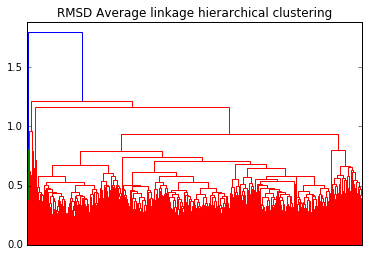

In [20]:
plt.title('RMSD Average linkage hierarchical clustering')
_ = scipy.cluster.hierarchy.dendrogram(linkage, no_labels=True, count_sort='descendent')

In [10]:
mapping = defaultdict(lambda : [])
for i, label in enumerate(labels):
    mapping[label].append(i)

mapping

NameError: name 'defaultdict' is not defined

In [ ]:
n_leaders_per_cluster = 2
leaders = md.Trajectory(xyz=np.empty((0, subsampled.n_atoms, 3)),
                        topology=subsampled.topology)
leader_labels = []
for label, indices in mapping.items():
    leaders = leaders.join(subsampled[np.random.choice(indices, n_leaders_per_cluster)])
    leader_labels.extend([label] * n_leaders_per_cluster)

print(leaders)
print(leader_labels)